In [1]:
#Q2

In [15]:
import pandas as pd 
import numpy as np
import seaborn as sns

# KNN Classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Grid Search for Algorithm Tuning
from sklearn.model_selection import GridSearchCV

# Standardization of data 
from sklearn.preprocessing import StandardScaler

# Building and testing the model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

#Visualization 
import matplotlib.pyplot as plt

#warnings
import warnings
warnings.filterwarnings('ignore')


In [43]:
glassdata = pd.read_csv("glass.csv")
glassdata.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


# EDA

In [44]:
glassdata.shape

(214, 10)

In [45]:
glassdata['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [46]:
glassdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [47]:
glassdata.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [48]:
glassdata[glassdata.duplicated()].shape

(1, 10)

In [49]:
glassdata[glassdata.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [50]:
glassdata1 = glassdata.drop_duplicates()
glassdata1

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [24]:
corr = glassdata1.corr()
corr

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.198802,-0.127526,-0.400973,-0.539000,-0.287645,0.811183,0.001679,0.147083,-0.160140
Na,-0.198802,1.000000,-0.278420,0.167735,-0.064885,-0.264158,-0.278194,0.329080,-0.239374,0.508837
Mg,-0.127526,-0.278420,1.000000,-0.479575,-0.162437,0.007617,-0.446197,-0.491818,0.085426,-0.744195
Al,-0.400973,0.167735,-0.479575,1.000000,-0.016195,0.323683,-0.258068,0.480642,-0.080583,0.597432
Si,-0.539000,-0.064885,-0.162437,-0.016195,1.000000,-0.197281,-0.207145,-0.104389,-0.097717,0.147725
K,-0.287645,-0.264158,0.007617,0.323683,-0.197281,1.000000,-0.317032,-0.043653,-0.009372,-0.012455
Ca,0.811183,-0.278194,-0.446197,-0.258068,-0.207145,-0.317032,1.000000,-0.112208,0.126314,0.002677
Ba,0.001679,0.329080,-0.491818,0.480642,-0.104389,-0.043653,-0.112208,1.000000,-0.059729,0.574896
Fe,0.147083,-0.239374,0.085426,-0.080583,-0.097717,-0.009372,0.126314,-0.059729,1.000000,-0.191090
Type,-0.160140,0.508837,-0.744195,0.597432,0.147725,-0.012455,0.002677,0.574896,-0.191090,1.000000


<AxesSubplot:>

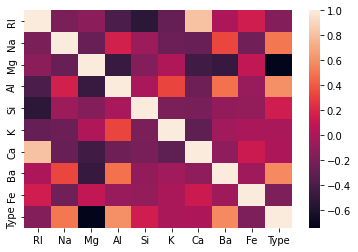

In [12]:
sns.heatmap(corr)

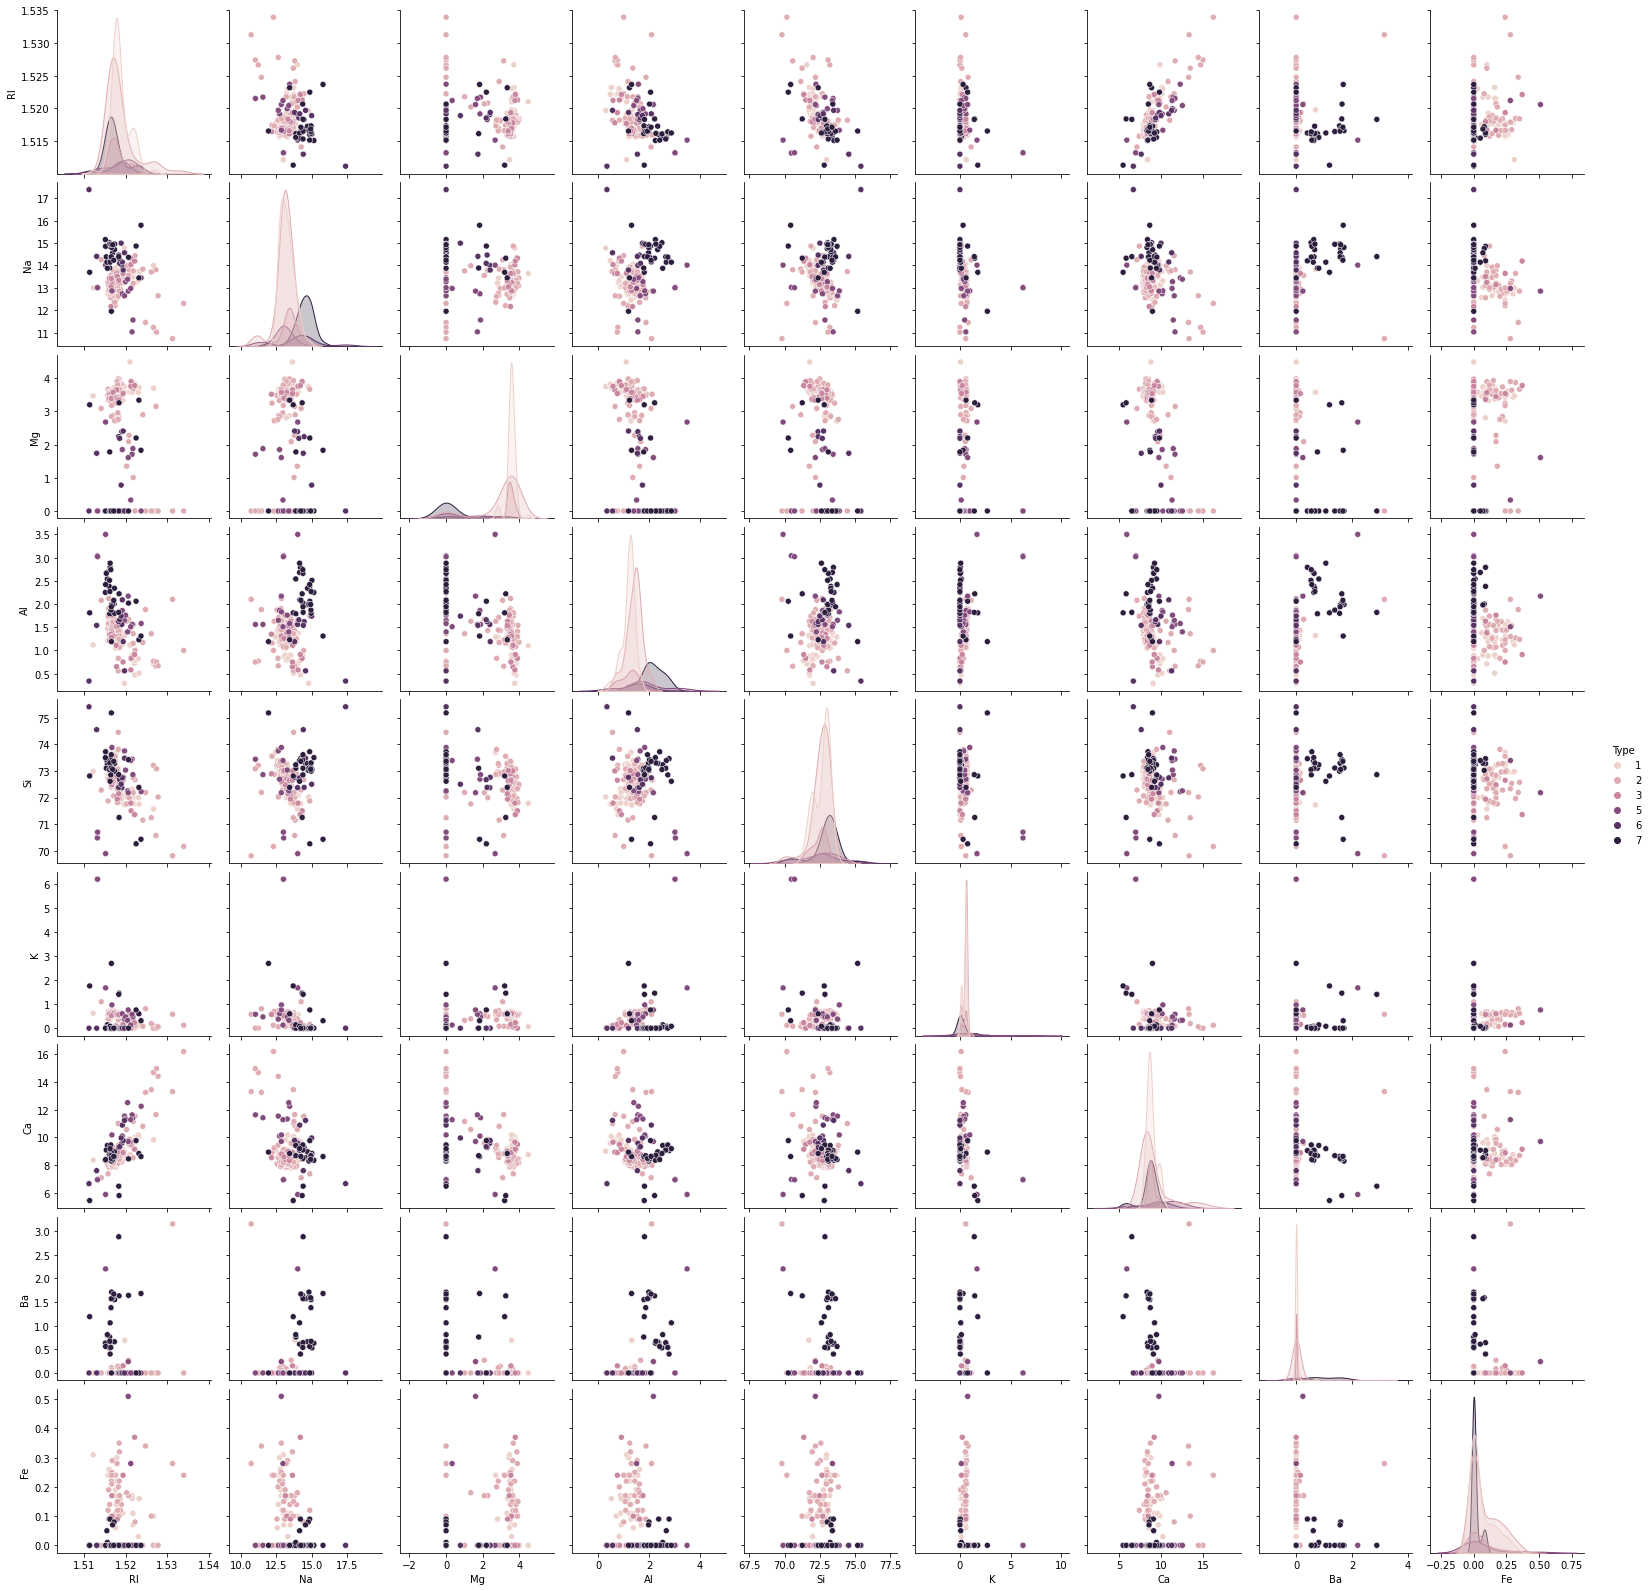

In [13]:
# pair plot 

sns.pairplot(glassdata1 , hue = "Type")
plt.show()

# paiplot--> shows that data is non -linear and KNN can be applied 

# feature scalling

In [25]:
glassdata1

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [40]:
glassdata2 = glassdata1.iloc[:,0:9]
glassdata2

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [51]:
array = glassdata2.values
array

array([[ 1.52101, 13.64   ,  4.49   , ...,  8.75   ,  0.     ,  0.     ],
       [ 1.51761, 13.89   ,  3.6    , ...,  7.83   ,  0.     ,  0.     ],
       [ 1.51618, 13.53   ,  3.55   , ...,  7.78   ,  0.     ,  0.     ],
       ...,
       [ 1.52065, 14.36   ,  0.     , ...,  8.44   ,  1.64   ,  0.     ],
       [ 1.51651, 14.38   ,  0.     , ...,  8.48   ,  1.57   ,  0.     ],
       [ 1.51711, 14.23   ,  0.     , ...,  8.62   ,  1.67   ,  0.     ]])

In [52]:
# normalization function


stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)

In [53]:
X

array([[ 0.87984017,  0.28955813,  1.25723832, ..., -0.14346582,
        -0.35380764, -0.58830108],
       [-0.24381562,  0.59640332,  0.63931074, ..., -0.79020061,
        -0.35380764, -0.58830108],
       [-0.71641202,  0.15454625,  0.6045957 , ..., -0.82534924,
        -0.35380764, -0.58830108],
       ...,
       [ 0.76086485,  1.17327228, -1.86017161, ..., -0.36138732,
         2.94550057, -0.58830108],
       [-0.60735132,  1.19781989, -1.86017161, ..., -0.33326842,
         2.80467644, -0.58830108],
       [-0.40905912,  1.01371278, -1.86017161, ..., -0.23485225,
         3.00585377, -0.58830108]])

In [54]:
glassdata_df = pd.DataFrame(X,columns = glassdata.columns[:-1])
glassdata_df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.879840,0.289558,1.257238,-0.706370,-1.133248,-0.673480,-0.143466,-0.353808,-0.588301
1,-0.243816,0.596403,0.639311,-0.180863,0.097037,-0.028962,-0.790201,-0.353808,-0.588301
2,-0.716412,0.154546,0.604596,0.182950,0.433746,-0.167073,-0.825349,-0.353808,-0.588301
3,-0.227291,-0.238216,0.701798,-0.322346,-0.058368,0.109149,-0.516041,-0.353808,-0.588301
4,-0.306608,-0.164573,0.653197,-0.423405,0.550299,0.078457,-0.621487,-0.353808,-0.588301
...,...,...,...,...,...,...,...,...,...
208,-0.699888,0.903249,-1.860172,2.891336,-0.058368,-0.642789,0.158812,1.778672,-0.588301
209,-0.494986,1.860605,-1.860172,1.092483,0.524398,-0.765554,-0.389506,2.844912,-0.588301
210,0.760865,1.173272,-1.860172,1.153118,0.990612,-0.765554,-0.361387,2.945501,-0.588301
211,-0.607351,1.197820,-1.860172,0.991424,1.236668,-0.765554,-0.333268,2.804676,-0.588301


# building the model to train and test 

In [55]:
x = glassdata_df
y = glassdata1['Type']

In [56]:
x

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.879840,0.289558,1.257238,-0.706370,-1.133248,-0.673480,-0.143466,-0.353808,-0.588301
1,-0.243816,0.596403,0.639311,-0.180863,0.097037,-0.028962,-0.790201,-0.353808,-0.588301
2,-0.716412,0.154546,0.604596,0.182950,0.433746,-0.167073,-0.825349,-0.353808,-0.588301
3,-0.227291,-0.238216,0.701798,-0.322346,-0.058368,0.109149,-0.516041,-0.353808,-0.588301
4,-0.306608,-0.164573,0.653197,-0.423405,0.550299,0.078457,-0.621487,-0.353808,-0.588301
...,...,...,...,...,...,...,...,...,...
208,-0.699888,0.903249,-1.860172,2.891336,-0.058368,-0.642789,0.158812,1.778672,-0.588301
209,-0.494986,1.860605,-1.860172,1.092483,0.524398,-0.765554,-0.389506,2.844912,-0.588301
210,0.760865,1.173272,-1.860172,1.153118,0.990612,-0.765554,-0.361387,2.945501,-0.588301
211,-0.607351,1.197820,-1.860172,0.991424,1.236668,-0.765554,-0.333268,2.804676,-0.588301


In [57]:
y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 213, dtype: int64

In [58]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state= 42)

In [60]:
x_train

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
173,0.737731,-0.680073,-0.742348,1.456296,-0.615233,0.400716,0.524358,0.129018,4.649990
137,-0.531339,-0.753716,0.583767,0.182950,0.912909,0.247260,-0.740993,-0.353808,-0.588301
65,1.048389,-0.434597,0.674026,-1.171243,-0.563432,-0.473986,0.629804,-0.353808,1.157796
108,-0.055438,0.387749,-1.860172,-1.797810,2.324499,-0.765554,1.431193,-0.353808,-0.588301
181,0.268439,0.915522,-1.860172,1.294601,0.109987,-0.765554,1.353866,-0.353808,-0.588301
...,...,...,...,...,...,...,...,...,...
106,5.149732,-1.355132,-1.860172,-0.908489,-3.231207,-0.581406,5.086650,-0.353808,1.876777
14,-0.237206,-0.974644,0.632368,-0.281922,0.822257,0.124494,-0.319209,-0.353808,-0.588301
92,-0.808948,-0.201394,0.458793,0.041467,0.576200,-0.167073,-0.516041,-0.353808,-0.588301
179,-1.770666,1.222368,-0.652088,0.182950,2.454002,-0.765554,-0.958914,-0.353808,-0.588301


In [61]:
x_test

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
9,-0.263645,-0.495966,0.639311,-0.180863,0.433746,0.109149,-0.389506,-0.353808,0.541526
197,-1.003936,1.197820,-1.860172,2.446676,0.576200,-0.704171,0.088515,0.933727,-0.588301
66,1.048389,-0.434597,0.674026,-1.171243,-0.433928,-0.473986,0.629804,-0.353808,1.157796
191,-0.699888,0.976891,-1.860172,2.709430,1.042413,-0.704171,0.060396,0.450902,0.336103
117,-0.534644,-0.127751,0.667083,0.162738,-0.161971,0.231914,-0.649606,-0.353808,2.390335
...,...,...,...,...,...,...,...,...,...
67,1.048389,-0.348680,0.625425,-1.110607,-0.589333,-0.412604,0.608715,-0.353808,1.055084
5,-0.789119,-0.753716,0.646254,0.344645,0.407845,0.216568,-0.621487,-0.353808,2.082200
135,-0.095096,-0.495966,0.778171,-0.746794,0.537349,0.093803,-0.403566,-0.353808,0.644238
56,-0.035609,-0.655525,0.555995,-0.322346,0.381944,0.155186,-0.368417,-0.353808,-0.588301


In [62]:
y_train

174    5
138    2
66     1
109    2
182    6
      ..
107    2
14     1
93     2
180    6
103    2
Name: Type, Length: 149, dtype: int64

In [63]:
y_test

9      1
198    7
67     1
192    7
118    2
      ..
68     1
5      1
136    2
57     1
200    7
Name: Type, Length: 64, dtype: int64

# KNN model

In [65]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [66]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category

1    26
2    24
7     8
5     4
6     2
dtype: int64

In [67]:
pd.crosstab(y_test,preds)

col_0,1,2,5,6,7
Type,,,,,
1,16,2,0,0,0
2,6,16,2,0,0
3,3,1,0,0,0
5,0,2,2,0,0
6,0,1,0,2,0
7,1,2,0,0,8


In [68]:
print('Accuracy',accuracy_score(y_test,preds)*100)

Accuracy 68.75


In [69]:
model.score(x_train,y_train)*100

79.19463087248322

In [71]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           1       0.62      0.89      0.73        18
           2       0.67      0.67      0.67        24
           3       0.00      0.00      0.00         4
           5       0.50      0.50      0.50         4
           6       1.00      0.67      0.80         3
           7       1.00      0.73      0.84        11

    accuracy                           0.69        64
   macro avg       0.63      0.57      0.59        64
weighted avg       0.67      0.69      0.67        64



# grid search for algorithum tuning

In [74]:
n_neighbors = np.array(range(1,11))
param_grid = dict(n_neighbors=n_neighbors)

In [75]:
model = model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(x, y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])})

In [76]:
print("The accuracy for model is: ",grid.best_score_*100)
print("Best suited no. of neighbors are: ",grid.best_params_)

The accuracy for model is:  66.66666666666667
Best suited no. of neighbors are:  {'n_neighbors': 2}


#  visualized the cv results 

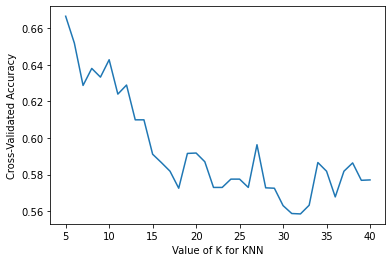

Best accuracy is 66.66666666666667 with K index as = 35


In [78]:
# choosen k between 5 to 41

k_range =range(5,41)
k_scores = []

# use iteration to calcultor diffrent k in modelsthen return avg accuracy based on cross validation

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x, y, cv=10)
    k_scores.append(scores.mean())
    
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

print("Best accuracy is {} with K index as = {}".format(np.max(k_scores)*100, k_range.index(np.max(k_range))))